In [8]:
import tensorflow
import os
import tarfile
import cv2
import h5py
import numpy as np
# import imageio
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageOps
import pandas as pd
import csv
from numpy import savez_compressed
from numpy import load
import glob
from skimage.util import img_as_ubyte
import train_with_pred
import tensorflow as tf
from tempfile import TemporaryFile


/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ecbm4040/miniconda3/envs/

Extract Processed Data 

In [2]:
train_data1 = load(os.getcwd()+'/data/final_train_image_cropped.npz', allow_pickle=True)
train = train_data1['arr_0']

val_data1 = load(os.getcwd()+'/data/final_validation_image_cropped.npz', allow_pickle=True)
val = val_data1['arr_0']

val_data = load(os.getcwd()+'/data/final_validation_label.npz', allow_pickle=True)
val_label = val_data['arr_0']

train_data = load(os.getcwd()+'/data/final_train_label.npz', allow_pickle=True)
train_label = train_data['arr_0']

test_data1 = load(os.getcwd()+'/data/final_test_image_cropped.npz', allow_pickle=True)
test = test_data1['arr_0']

test_data = load(os.getcwd()+'/data/final_test_label.npz', allow_pickle=True)
test_label = test_data['arr_0']


In [3]:
conv_featmap = (48, 64, 128, 160, 192, 192, 192, 192)
fc_units = (3072, 3072)
conv_kernel_size = (5, 5, 5, 5, 5, 5, 5, 5)
pooling_size = (2, 2, 2, 2, 2, 2, 2, 2)
stride_size = (2, 1, 2, 1, 2, 1, 2, 1)

tf.reset_default_graph()
# tf.debugging.set_log_device_placement(True)
train_with_pred.train(train, train_label, val, val_label,test, test_label,
                conv_featmap=conv_featmap,
                fc_units=fc_units,
                conv_kernel_size=conv_kernel_size,
                pooling_size=pooling_size,
                l2_norm=0,
                seed=888,
                learning_rate=3e-3,
                epoch=400,
                batch_size=1024,
                verbose=False,
                stride_size = stride_size,
                drop_rate=0             
                )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
number of batches for training: 26
Instructions for updating:
Use tf.cast instead.
epoch 1 
10.699494
0.0
epoch 2 
7.9473786
0.0
epoch 3 
7.2329187
0.0
epoch 4 
7.2722845
7.48503e-05
Best validation accuracy! iteration:80 accuracy: 7.485030073439702e-05
prediction:  5.988024e-05
6.93727
0.0008483034
Best validation accuracy! iteration:100 accuracy: 0.0008483033743686974
prediction:  0.0015397776
epoch 5 
6.921323
0.0027694611
Best validation accuracy! iteration:120 accuracy: 0.0027694611344486475
prediction:  0.0037258815
epoch 6 
6.8942857
0.0033832334
Best validation accuracy! iteration:140 accuracy: 0.00338323344476521
prediction:  0.003075667
epoch 7 
6.8542757
0.0028942116


2.2323713
0.22638813
Best validation accuracy! iteration:1160 accuracy: 0.2263881266117096
prediction:  0.22843502
epoch 46 
2.4289594
0.23050417
Best validation accuracy! iteration:1180 accuracy: 0.23050417006015778
prediction:  0.23249695
epoch 47 
2.0125995
0.23471478
Best validation accuracy! iteration:1200 accuracy: 0.23471477627754211
prediction:  0.23688102
2.009154
0.2391751
Best validation accuracy! iteration:1220 accuracy: 0.23917509615421295
prediction:  0.24143508
epoch 48 
1.8285381
0.24368466
Best validation accuracy! iteration:1240 accuracy: 0.24368466436862946
prediction:  0.24594676
epoch 49 
2.0185845
0.24784182
Best validation accuracy! iteration:1260 accuracy: 0.24784182012081146
prediction:  0.24973524
epoch 50 
2.243194
0.25194612
Best validation accuracy! iteration:1280 accuracy: 0.2519461214542389
prediction:  0.25403583
1.9937774
0.2562633
Best validation accuracy! iteration:1300 accuracy: 0.25626328587532043
prediction:  0.25845268
epoch 51 
1.8538529
0.260495

prediction:  0.40071905
0.26573294
0.4015691
Best validation accuracy! iteration:2520 accuracy: 0.40156909823417664
prediction:  0.40240738
epoch 98 
0.18283561
0.40322554
Best validation accuracy! iteration:2540 accuracy: 0.40322554111480713
prediction:  0.40404674
epoch 99 
0.1725694
0.404871
Best validation accuracy! iteration:2560 accuracy: 0.40487098693847656
prediction:  0.40568262
epoch 100 
0.1042668
0.40651047
Best validation accuracy! iteration:2580 accuracy: 0.40651047229766846
prediction:  0.40731037
0.120294586
0.40809804
Best validation accuracy! iteration:2600 accuracy: 0.408098042011261
prediction:  0.40886182
epoch 101 
0.10563144
0.409629
Best validation accuracy! iteration:2620 accuracy: 0.4096289873123169
prediction:  0.41037613
epoch 102 
0.09023873
0.4111023
Best validation accuracy! iteration:2640 accuracy: 0.411102294921875
prediction:  0.41184026
epoch 103 
0.08626527
0.41258293
Best validation accuracy! iteration:2660 accuracy: 0.4125829339027405
prediction:  

prediction:  0.47214454
epoch 148 
0.0025860663
0.4724964
Best validation accuracy! iteration:3840 accuracy: 0.4724963903427124
prediction:  0.47284004
epoch 149 
0.0032985571
0.47318107
Best validation accuracy! iteration:3860 accuracy: 0.4731810688972473
prediction:  0.4735227
epoch 150 
0.0027183273
0.47386014
Best validation accuracy! iteration:3880 accuracy: 0.47386014461517334
prediction:  0.47419584
0.00292061
0.47453526
Best validation accuracy! iteration:3900 accuracy: 0.4745352566242218
prediction:  0.47486278
epoch 151 
0.0027041286
0.47519946
Best validation accuracy! iteration:3920 accuracy: 0.47519946098327637
prediction:  0.47552666
epoch 152 
0.0029126238
0.47585294
Best validation accuracy! iteration:3940 accuracy: 0.47585293650627136
prediction:  0.47617522
epoch 153 
0.0026337248
0.4764997
Best validation accuracy! iteration:3960 accuracy: 0.4764997065067291
prediction:  0.47682175
epoch 154 
0.0022799657
0.47714442
Best validation accuracy! iteration:3980 accuracy: 

epoch 198 
0.0009214204
0.5057778
Best validation accuracy! iteration:5140 accuracy: 0.5057777762413025
prediction:  0.50596565
epoch 199 
0.0011888326
0.50615627
Best validation accuracy! iteration:5160 accuracy: 0.5061562657356262
prediction:  0.5063438
epoch 200 
0.0010156697
0.5065323
Best validation accuracy! iteration:5180 accuracy: 0.5065323114395142
prediction:  0.5067178
0.0010782152
0.5069049
Best validation accuracy! iteration:5200 accuracy: 0.5069049000740051
prediction:  0.50708777
epoch 201 
0.0010129723
0.5072769
Best validation accuracy! iteration:5220 accuracy: 0.5072768926620483
prediction:  0.50746006
epoch 202 
0.0011087182
0.5076466
Best validation accuracy! iteration:5240 accuracy: 0.5076466202735901
prediction:  0.5078266
epoch 203 
0.0010023231
0.50801057
Best validation accuracy! iteration:5260 accuracy: 0.5080105662345886
prediction:  0.50819033
epoch 204 
0.0009244514
0.50837344
Best validation accuracy! iteration:5280 accuracy: 0.5083734393119812
prediction:

prediction:  0.52557486
epoch 249 
0.0006808892
0.52569604
Best validation accuracy! iteration:6460 accuracy: 0.5256960391998291
prediction:  0.525814
epoch 250 
0.000589674
0.52593344
Best validation accuracy! iteration:6480 accuracy: 0.5259334444999695
prediction:  0.5260502
0.0006191153
0.5261704
Best validation accuracy! iteration:6500 accuracy: 0.5261703729629517
prediction:  0.52628595
epoch 251 
0.00059102604
0.5264058
Best validation accuracy! iteration:6520 accuracy: 0.5264058113098145
prediction:  0.52652204
epoch 252 
0.000641201
0.52664024
Best validation accuracy! iteration:6540 accuracy: 0.5266402363777161
prediction:  0.5267562
epoch 253 
0.000586648
0.5268746
Best validation accuracy! iteration:6560 accuracy: 0.5268746018409729
prediction:  0.5269885
epoch 254 
0.0005493953
0.5271048
Best validation accuracy! iteration:6580 accuracy: 0.5271047949790955
prediction:  0.52721614
0.0005547552
0.5273322
Best validation accuracy! iteration:6600 accuracy: 0.5273321866989136
pr

0.53863055
Best validation accuracy! iteration:7760 accuracy: 0.5386305451393127
prediction:  0.538713
epoch 300 
0.00040534476
0.53879637
Best validation accuracy! iteration:7780 accuracy: 0.5387963652610779
prediction:  0.53887755
0.00042394377
0.5389609
Best validation accuracy! iteration:7800 accuracy: 0.538960874080658
prediction:  0.5390409
epoch 301 
0.00040670112
0.53912383
Best validation accuracy! iteration:7820 accuracy: 0.5391238331794739
prediction:  0.5392046
epoch 302 
0.00044034305
0.5392871
Best validation accuracy! iteration:7840 accuracy: 0.5392870903015137
prediction:  0.5393678
epoch 303 
0.000405211
0.5394499
Best validation accuracy! iteration:7860 accuracy: 0.5394498705863953
prediction:  0.5395294
epoch 304 
0.00038209045
0.53961104
Best validation accuracy! iteration:7880 accuracy: 0.5396110415458679
prediction:  0.5396894
0.00038537025
0.53977025
Best validation accuracy! iteration:7900 accuracy: 0.539770245552063
prediction:  0.5398494
epoch 305 
0.000340126

prediction:  0.5479029
epoch 350 
0.00030485474
0.5479633
Best validation accuracy! iteration:9080 accuracy: 0.5479633212089539
prediction:  0.54802233
0.00031748525
0.54808223
Best validation accuracy! iteration:9100 accuracy: 0.5480822324752808
prediction:  0.54814065
epoch 351 
0.00030586915
0.54820126
Best validation accuracy! iteration:9120 accuracy: 0.5482012629508972
prediction:  0.5482601
epoch 352 
0.00033053433
0.5483205
Best validation accuracy! iteration:9140 accuracy: 0.548320472240448
prediction:  0.54837966
epoch 353 
0.00030533926
0.5484401
Best validation accuracy! iteration:9160 accuracy: 0.5484400987625122
prediction:  0.5484987
epoch 354 
0.000289074
0.5485579
Best validation accuracy! iteration:9180 accuracy: 0.5485578775405884
prediction:  0.5486149
0.0002916053
0.5486745
Best validation accuracy! iteration:9200 accuracy: 0.5486745238304138
prediction:  0.548732
epoch 355 
0.00025759506
0.54879063
Best validation accuracy! iteration:9220 accuracy: 0.54879063367843

prediction:  0.5547073
epoch 400 
0.00024182421
0.55475354
Best validation accuracy! iteration:10380 accuracy: 0.5547535419464111
prediction:  0.55479765
0.0002515162
0.5548432
Best validation accuracy! iteration:10400 accuracy: 0.5548431873321533
prediction:  0.5548871
Traning ends. The best valid accuracy is 0.5548431873321533. Model named cnn_1576392924.


[0.5548432, 0.5548871]

Prediction Accuracy and Loss History

In [15]:
from numpy import loadtxt
loss_g = loadtxt('loss_array2.csv', delimiter=',')
pre_g = loadtxt('pre_array2.csv', delimiter=',')

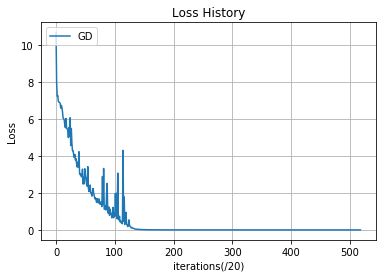

In [16]:
# plt.plot(val_loss1_2)
%matplotlib inline
# plt.plot(plt.plot(val_acc1_2))
plt.plot(loss_g)
plt.title('Loss History')
plt.ylabel('Loss')
plt.xlabel('iterations(/20)')
plt.legend(['GD'], loc='upper left')
plt.grid()
plt.savefig('loss_tensorflow.png')
plt.show()

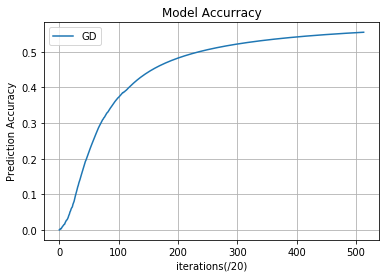

In [17]:
# plt.plot(val_loss1_2)
%matplotlib inline
# plt.plot(plt.plot(val_acc1_2))
plt.plot(pre_g)
plt.title('Model Accurracy')
plt.ylabel('Prediction Accuracy')
plt.xlabel('iterations(/20)')
plt.legend(['GD'], loc='upper left')
plt.grid()
plt.savefig('pre_acc.png')
plt.show()